# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team RR-7#RAVE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages



In [3]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
#Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

In [5]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
df_train.shape

(15819, 3)

In [7]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [8]:
df_test.shape

(10546, 2)

<a id="three"></a>
## 3. Data Cleaning

| In this section, we performed indepth cleaning of the data |
---


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [11]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [12]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

### To remove the punction marks, @mentions and special characters, we create a function 

In [13]:
import re

def clean_tweet(twts):
    ''' This function takes a array, list or series like objects containing tweets
        and replace all with empty pace, and convert to lower case
    '''
    
    # to convert to lower case
    twts = twts.lower()
    
    # Remove mentions (e.g., @username)
    twts = re.sub(r'@[A-Za-z0-9_]+', '', twts)

    # Remove URLs (e.g., https://example.com)
    twts = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', twts)

    # Remove punctuation marks
    twts = re.sub(r'[^\w\s]', '', twts)

    return twts

In [14]:
df = df_train.copy() # assign the dataframe to a new object


df['message'] = df['message'].apply(clean_tweet)

In [15]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


In [16]:
# check for dublicate row in the data frame

df.duplicated().sum()

0

In [17]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,rt they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,rt how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,rt hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byãââ,819732


#### NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

## 4. Exploratory Data Analysis (EDA)


| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |
---

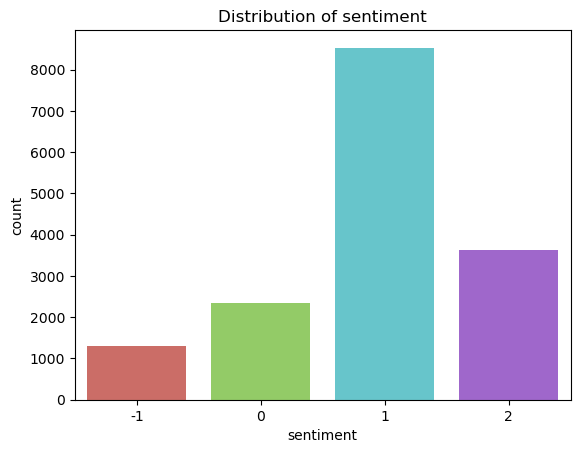

In [18]:
# To visualize the distributon of the sentiments, we plot a count plot and the unique sentiments we have 

sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

['pro' 'news' 'neutral' 'anti']


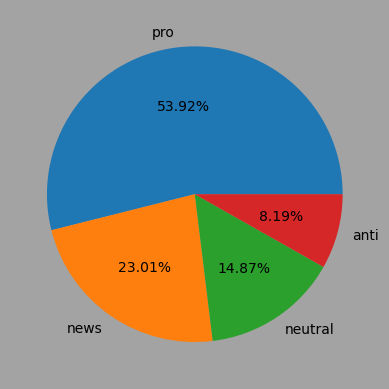

In [19]:
pie_x = df.sentiment.value_counts()
labels = df.sentiment.unique()


# Define the label mapping dictionary
label_mapping = {1: 'pro', 2: 'news', 0: 'neutral', -1: 'anti'}

# Create a vectorized function to apply the mapping
vfunc = np.vectorize(lambda x: label_mapping[x])

# Apply the mapping to the labels
mapped_labels = vfunc(labels)
print(mapped_labels)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%', labels = mapped_labels)
plt.show()

#### Observation: 

- from the bargragh above, we can deduce that we have 4 groups of sentiments.
- the sentiment is imbalanced

### let explore the tweets to generate insights

In [20]:
# install the wordcloud to create the word visuals

# !pip install wordcloud

#### To create a word cloud we first need to tokenize the tweets, lemmatize or stem the words and then join all as single sentences to create the word clound

- word cloud will be divided into two groups one for people who believe in the effect of climate change and the other for those who do not beleieve

In [21]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [22]:
lemma = WordNetLemmatizer()

In [23]:
# tokenize the twts
df['message'] = df['message'].apply(lambda x: x.split())

In [24]:
# Define a function to lemmatize a single tweet
def lemmatize_tweet(tweet):
    
    # Lemmatize each word and join them back into a single string
    lemmatized_words = [lemma.lemmatize(twt) for twt in tweet]
    lemmatized_tweet = ' '.join(lemmatized_words)

    return lemmatized_tweet

In [25]:
df['clean_twt'] = df['message'].apply(lemmatize_tweet)

In [26]:
df.head()

,sentiment,message,tweetid,clean_twt
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,it not like we lack evidence of anthropogenic ...
2,2,"[rt, researchers, say, we, have, three, years,...",698562,rt researcher say we have three year to act on...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa a pivotal year in t...
4,1,"[rt, its, 2016, and, a, racist, sexist, climat...",466954,rt it 2016 and a racist sexist climate change ...


#### lets remove the stop words from the clean_twts before drawing our wordcloud

In [27]:
# create a function that removes stop words
def remove_stopwords(text):
    
    # create a set containing the stopwords we wish to remove
    stop_words = set(stopwords.words('english'))
    
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words:
            y.append(i)
            
    return " ".join(y)

In [28]:
df['clean_twt'] = df['clean_twt'].apply(remove_stopwords)
df.head()

,sentiment,message,tweetid,clean_twt
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,2,"[rt, researchers, say, we, have, three, years,...",698562,rt researcher say three year act climate chang...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[rt, its, 2016, and, a, racist, sexist, climat...",466954,rt 2016 racist sexist climate change denying b...


In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [30]:
# visualize the frequent words using wordcloud
all_words = " ".join([sentence for sentence in df['clean_twt']])

### Generate the wordcloud for all words in the messages

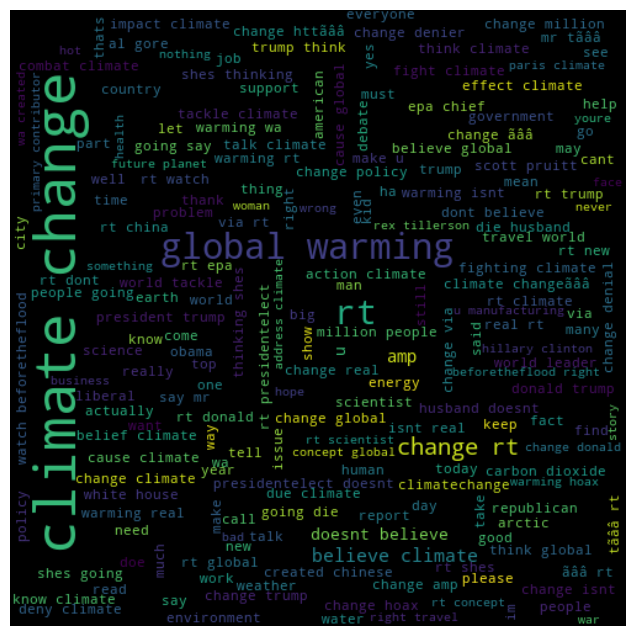

In [31]:
wordcloud_gen = wc.generate(all_words)
# plot the graph
plt.figure(figsize=(18,8))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 1 Pro: the tweet supports the belief of man-made climate change

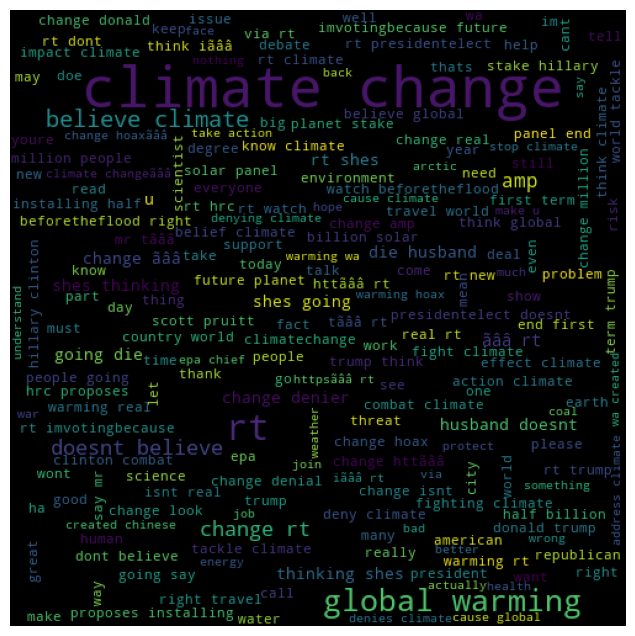

In [32]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 1]['clean_twt'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### 2 News: the tweet links to factual news about climate change

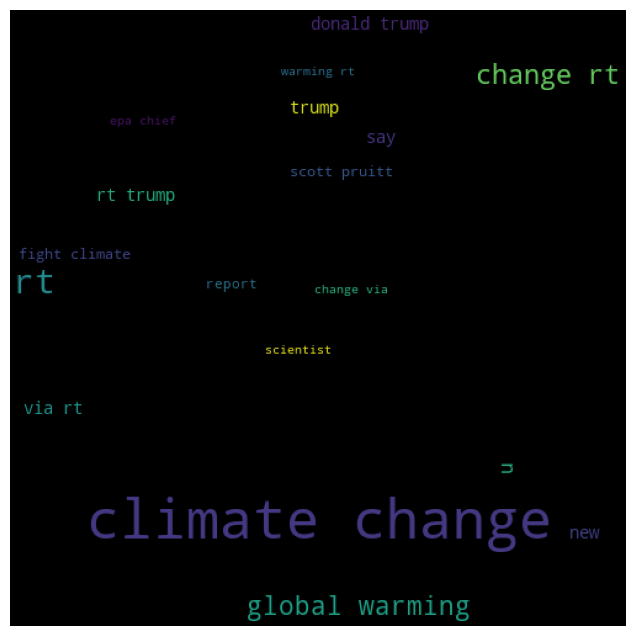

In [33]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 2]['clean_twt'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

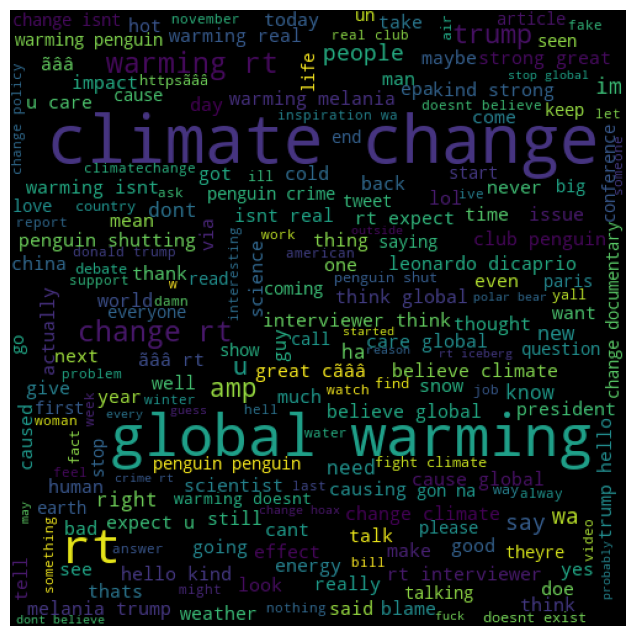

In [34]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 0]['clean_twt'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### -1 Anti: the tweet does not believe in man-made climate change Variable definitions

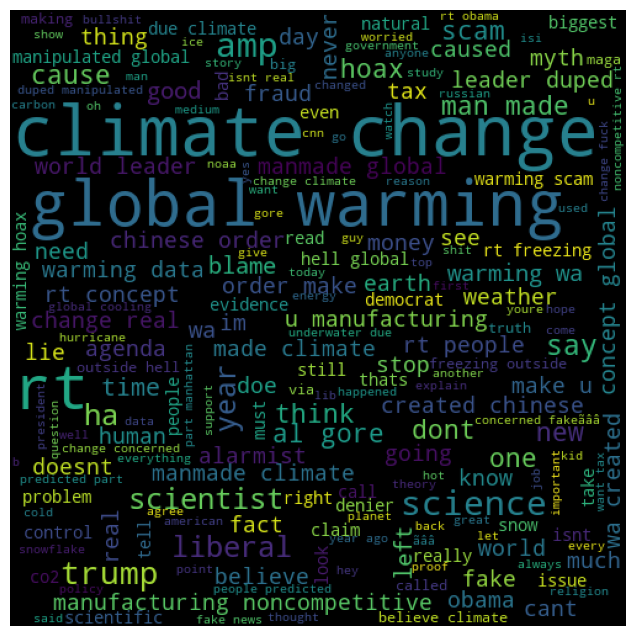

In [35]:
ptv_sentiment = wc.generate(df[df['sentiment'] == -1]['clean_twt'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Lets check the top ten most common words for each class of tweet

In [36]:
# Converting twts Messages to List of Words and extracting the top 10 words


# top 10 word for Pro tweet
twts = df[df['sentiment'] == 1]['clean_twt'].str.cat(sep= " ")
climate_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
twt_top_10words = pd.DataFrame(Counter(climate_twt).most_common(10))
twt_top_10words.head()

,0,1
0,climate,7362
1,change,7128
2,rt,5796
3,global,1597
4,warming,1448


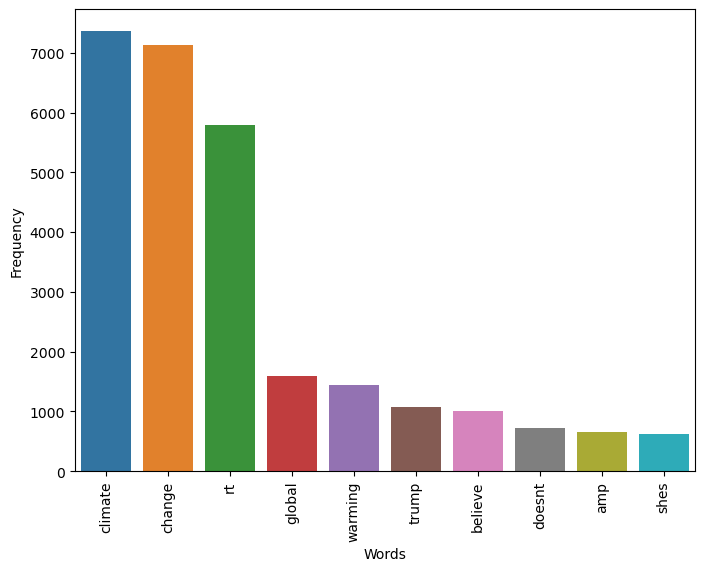

In [37]:
# Bar plot of top 10 pro twt words


plt.figure(figsize=(8, 6))
sns.barplot(x= twt_top_10words[0], y= twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()

In [38]:
# top 10 word for anti tweet
twts = df[df['sentiment'] == -1]['clean_twt'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
anti_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
anti_twt_top_10words.head()

,0,1
0,climate,799
1,change,756
2,rt,684
3,global,633
4,warming,609


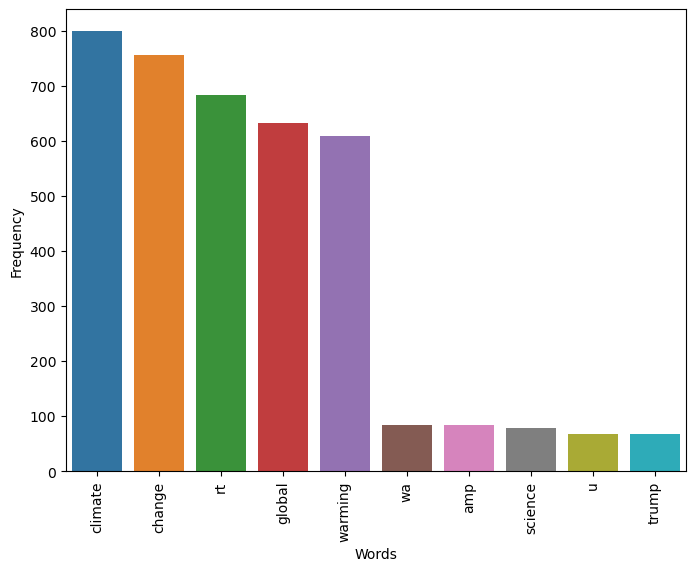

In [39]:
# plot a barplot to visualize the top 10 words used for anti twts

plt.figure(figsize=(8, 6))
sns.barplot(x= anti_twt_top_10words[0], y= anti_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()

In [40]:
# top 10 word for news tweet
twts = df[df['sentiment'] == 2]['clean_twt'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
news_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
news_twt_top_10words.head()

,0,1
0,climate,3349
1,change,3249
2,rt,2151
3,trump,1056
4,global,507


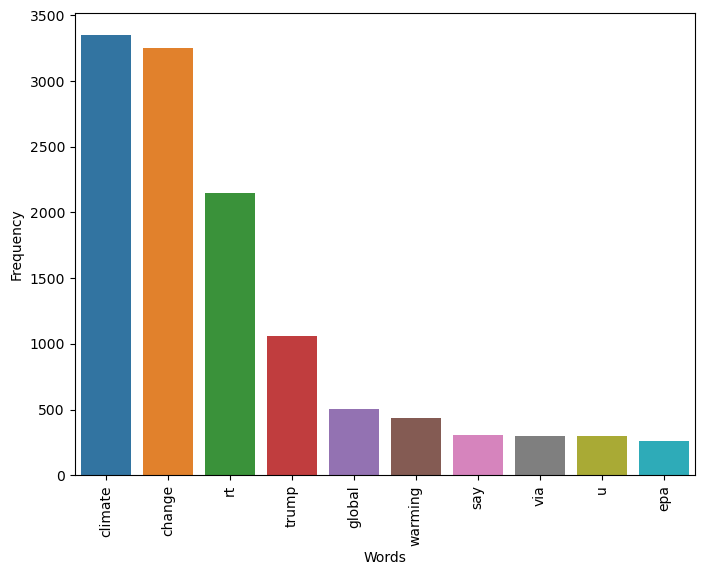

In [41]:
# plot a barplot to visualize the top 10 words used for anti twts

plt.figure(figsize=(8, 6))
sns.barplot(x= news_twt_top_10words[0], y= news_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()

In [42]:
# top 10 word for neutral tweet
twts = df[df['sentiment'] == 0]['clean_twt'].str.cat(sep= " ")
neutral_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
neutral_twt_top_10words = pd.DataFrame(Counter(neutral_twt).most_common(10))
neutral_twt_top_10words.head()

,0,1
0,climate,1443
1,change,1399
2,rt,1091
3,global,1038
4,warming,1001


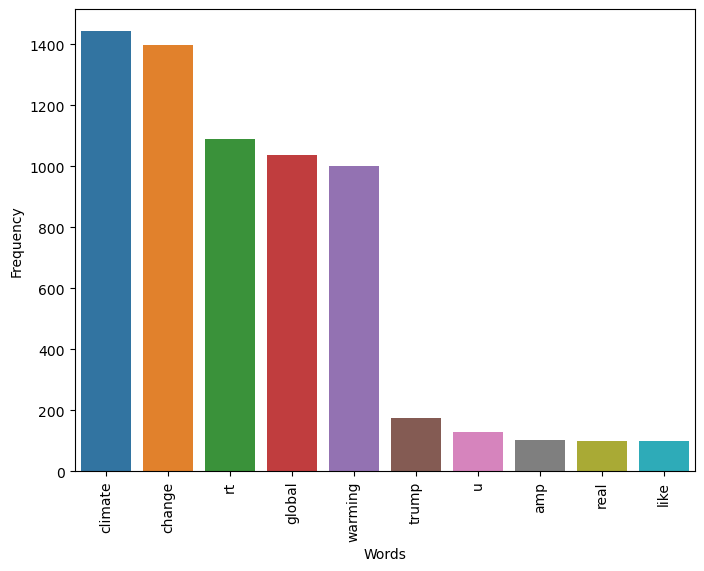

In [43]:
# plot a barplot to visualize the top 10 words used for neutral twts

plt.figure(figsize=(8, 6))
sns.barplot(x = neutral_twt_top_10words[0], y= neutral_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()

### Observation

- Among the observed data, approximately 53.92% express support for climate change.
- Approximately 23.01% of the observed data relate to news about climate change.
- Around 15% of the observed data exhibit a neutral stance towards climate change.
- Approximately 8% of the observed data express opposition to climate change.
- Based on the generated word clouds, the term "climate change" emerges as the most frequently used word across all sentiment types.
- The name "Trump" appears as a prominent influencer in discussions related to climate change.

### Conclusion

- We have observed a significant increase in the popularity of the idea of climate change, as evidenced by a considerable number of tweets expressing support for climate change.
- Climate change is increasingly influencing consumer preferences and product choices. Therefore, there is a need to develop a sentiment analysis model to analyze the sentiment of Twitter users' messages about climate change.

## 4. Feature Engineering


| In this section, we extract features from the text data and tranform them into the appropriate format for training our model. |
---

#### For the sentiment classes, we'll map the 4 classes into 2 classes for the classification- pro tweets and the news tweets for 1 and the neutral and anti-tweet for 0

The mapping used in the code snippet is assigning a binary encoding to the sentiment class in the DataFrame. It maps the sentiment values of 2 and 1 to 1, indicating a positive sentiment or belief in climate change. Similarly, it maps the sentiment values of 0 and -1 to 0, indicating a neutral or negative sentiment or disbelief in climate change.

The theory behind this mapping could be based on the assumption that sentiment classes 2 and 1, which represent tweets that support the belief of man-made climate change, can be considered as positive sentiments towards climate change. Hence, they are encoded as 1. On the other hand, sentiment classes 0 and -1, which represent tweets that neither support nor refute the belief of man-made climate change or tweets that do not believe in man-made climate change, can be considered as neutral or negative sentiments. Hence, they are encoded as 0.

By creating the 'belief' column with this mapping, it provides a simplified binary representation of the sentiment classes that can be used for further analysis or modeling tasks where a binary classification approach is desired.

In [44]:
df_new = df.copy()

In [45]:
# Load the dataset into a DataFrame

# Create a new column 'sentiment' based on the mapping
df_new['sentiment'] = df_new['sentiment'].map({2: 1, 1: 1, 0: 0, -1: 0})

df_new.head()


,sentiment,message,tweetid,clean_twt
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,1,"[rt, researchers, say, we, have, three, years,...",698562,rt researcher say three year act climate chang...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[rt, its, 2016, and, a, racist, sexist, climat...",466954,rt 2016 racist sexist climate change denying b...


In [46]:
pie_x_new = df_new.sentiment.value_counts() # to check if the data balances between the pro and the anti
pie_x_new

1    12170
0     3649
Name: sentiment, dtype: int64

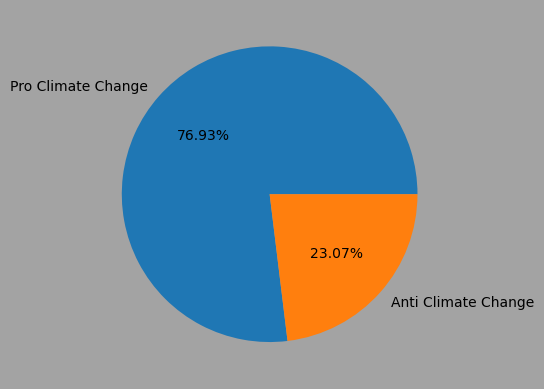

In [55]:
pie_x_new = df_new.sentiment.value_counts()
labels_new = df_new.sentiment.unique()


# Define the label mapping dictionary
label_mapping_new = {1 : 'Pro Climate Change', 0 : 'Anti Climate Change'}

# Create a vectorized function to apply the mapping
vfunc_new = np.vectorize(lambda x: label_mapping_new[x])

# Apply the mapping to the labels
mapped_labels_new = vfunc_new(labels_new)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(pie_x_new ,autopct='%0.2f%%', labels = mapped_labels_new)
plt.show()

#### the pro greatly superceeds the the anti climate tweet which signifies data inbalance

In [58]:
# let us install the imbalance learn module for handling the imbalance data
! pip install imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 242.4 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 301.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [59]:
#fix label imbalance using the imblearn module to carry out over sampling and under sampling and build the models to check for accuracy

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler()

In [60]:
df_new.head()

,sentiment,message,tweetid,clean_twt
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,1,"[rt, researchers, say, we, have, three, years,...",698562,rt researcher say three year act climate chang...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[rt, its, 2016, and, a, racist, sexist, climat...",466954,rt 2016 racist sexist climate change denying b...


In [71]:
# Assigning the features and the labels

X = df_new.clean_twt.to_numpy()
# Reshape the features data (X) to 2D array with a single feature
X = X.reshape(-1, 1) # features

y = df_new.sentiment # Label

In [72]:
c = Counter(y) # count the values in the labels
c

Counter({1: 12170, 0: 3649})

In [73]:
# Application of the Oversampling technique
X_ROS, y_ROS = ros.fit_resample(X, y)
print(Counter(y_ROS))

Counter({1: 12170, 0: 12170})


In [75]:
# Lets split the data using the sklearn train test_test_split module

from sklearn.model_selection import train_test_split

# Assuming you have your features stored in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X_ROS, y_ROS, test_size=0.2, random_state=42)

# Model Building

**we'll make use of the countvectorizer and TfidfTransformer for feature transformation on our tweets and converting it to binary array for our classifier**

In [80]:
# we'll use the pipeline module to combine both transformation and classifiers at a go?

from sklearn.pipeline import Pipeline # pipeline
from sklearn.feature_extraction.text import TfidfTransformer # Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from lightgbm import LGBMClassifier  # LightGBM classifier